In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
broadway = pd.read_csv("original_broadway.csv")
# listing columns header names

In [2]:
# check for blanks
broadway.info()
# No blank fields
# check for null values
broadway.isnull().any()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31296 entries, 0 to 31295
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date.Day                    31296 non-null  int64 
 1   Date.Full                   31296 non-null  object
 2   Date.Month                  31296 non-null  int64 
 3   Date.Year                   31296 non-null  int64 
 4   Show.Name                   31296 non-null  object
 5   Show.Theatre                31296 non-null  object
 6   Show.Type                   31296 non-null  object
 7   Statistics.Attendance       31296 non-null  int64 
 8   Statistics.Capacity         31296 non-null  int64 
 9   Statistics.Gross            31296 non-null  int64 
 10  Statistics.Gross Potential  31296 non-null  int64 
 11  Statistics.Performances     31296 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 2.9+ MB


Date.Day                      False
Date.Full                     False
Date.Month                    False
Date.Year                     False
Show.Name                     False
Show.Theatre                  False
Show.Type                     False
Statistics.Attendance         False
Statistics.Capacity           False
Statistics.Gross              False
Statistics.Gross Potential    False
Statistics.Performances       False
dtype: bool

In [3]:
#checking for duplicates
duplicates = broadway.duplicated()
sum(duplicates)
# no duplicates in data set

0

In [4]:
# splitting column names
import re
broadway.columns=[re.split(r'[.]', col)[1] for col in broadway.columns]
broadway.rename(columns={"Gross Potential": "Gross_Potential"}, inplace=True)



In [5]:
broadway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31296 entries, 0 to 31295
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Day              31296 non-null  int64 
 1   Full             31296 non-null  object
 2   Month            31296 non-null  int64 
 3   Year             31296 non-null  int64 
 4   Name             31296 non-null  object
 5   Theatre          31296 non-null  object
 6   Type             31296 non-null  object
 7   Attendance       31296 non-null  int64 
 8   Capacity         31296 non-null  int64 
 9   Gross            31296 non-null  int64 
 10  Gross_Potential  31296 non-null  int64 
 11  Performances     31296 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 2.9+ MB


In [6]:
#removing non numeric columns.  These will be looked at in Excel
#broadway.drop(columns=['Full','Name', 'Theatre', 'Type'], inplace=True)
broadway.shape

(31296, 12)

In [7]:
#convert all text to lower case
#broadway.Name.apply(lambda x: x.lower())
#broadway.Theatre.apply(lambda x: x.lower())
#broadway.Type.apply(lambda x: x.lower())

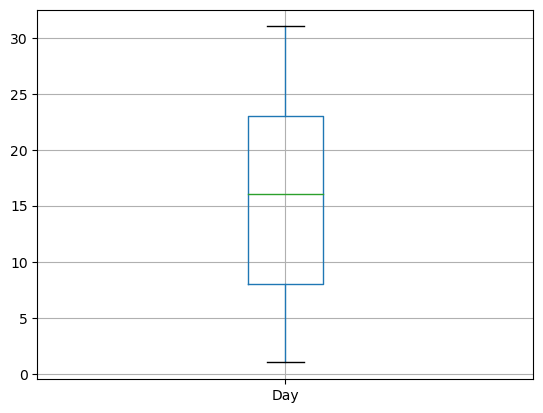

In [8]:
# visualizations


day= broadway.boxplot(column = 'Day')
day.plot()
plt.show()



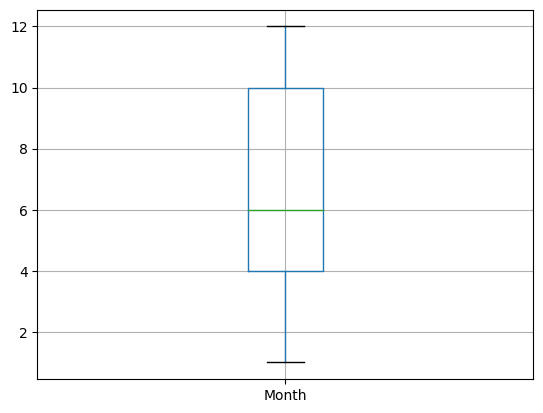

In [9]:
month = broadway.boxplot(column='Month')
month.plot()
plt.show()


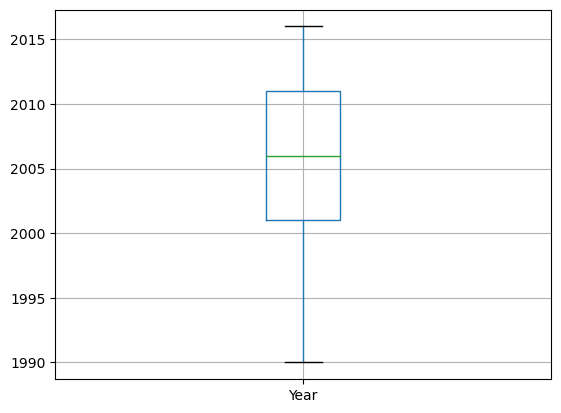

In [10]:
year = broadway.boxplot(column = 'Year')
year.plot()
plt.show()


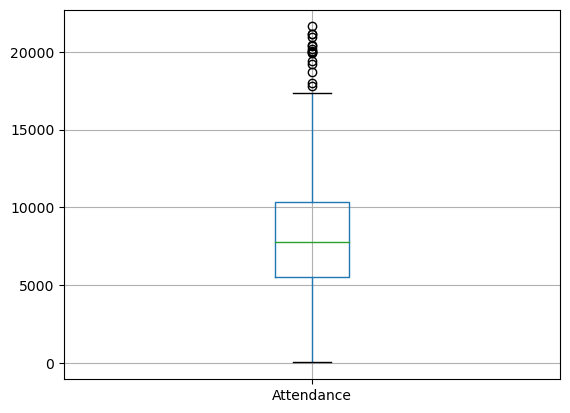

In [11]:
attendance = broadway.boxplot(column='Attendance')
attendance.plot()
plt.show()

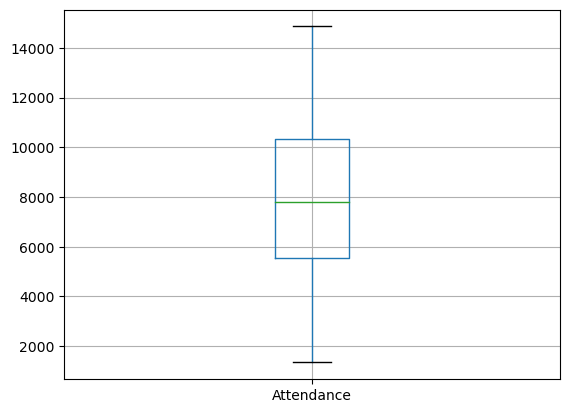

In [12]:
broadway_outliers = broadway[(broadway.Attendance < broadway.Attendance.quantile(.995)) & (broadway.Attendance > broadway.Attendance.quantile(.005))]
attendance_out = broadway_outliers.boxplot(column = 'Attendance')
attendance_out.plot()
plt.show()

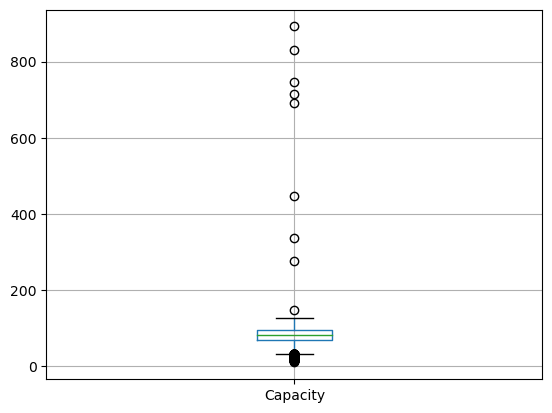

In [13]:
capacity = broadway.boxplot(column = 'Capacity')
capacity.plot()
plt.show()

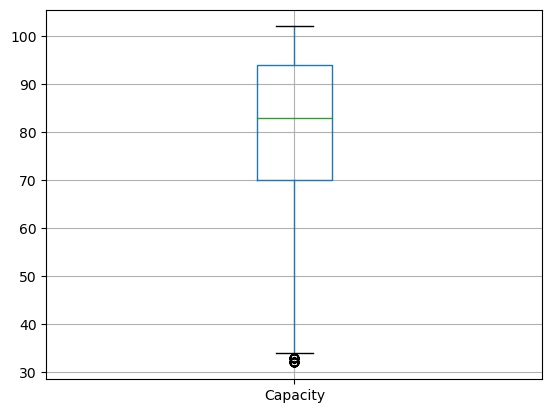

In [14]:
broadway_outliers = broadway[(broadway.Capacity < broadway.Capacity.quantile(.995)) & (broadway.Capacity > broadway.Capacity.quantile(.005))]

capacity_out = broadway_outliers.boxplot(column = 'Capacity')
capacity_out.plot()
plt.show()

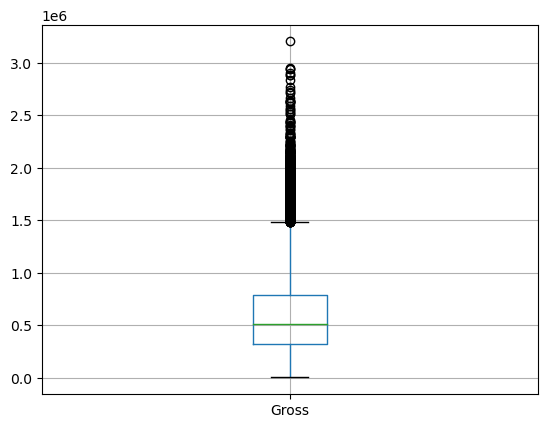

In [15]:
#broadway.hist('Gross')
gross = broadway.boxplot(column='Gross')
gross.plot()
plt.show()

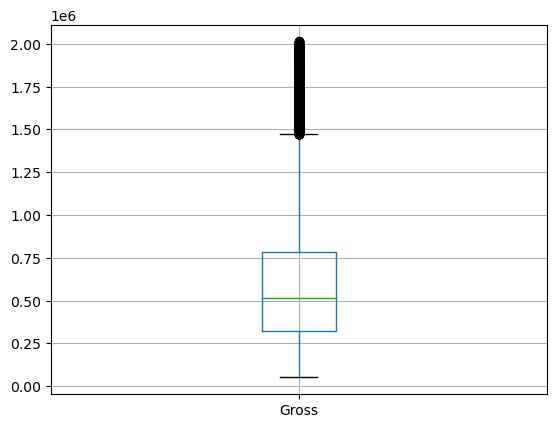

In [16]:
broadway_outliers = broadway[(broadway.Gross < broadway.Gross.quantile(.995)) & (broadway.Gross > broadway.Gross.quantile(.005))]
gross_out = broadway_outliers.boxplot(column = 'Gross')
gross_out.plot()
plt.show()

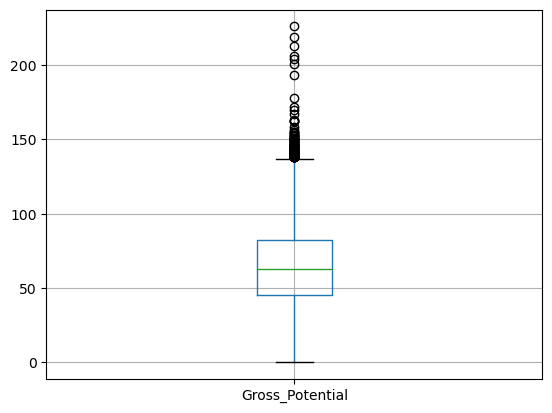

In [17]:
gross_potential = broadway.boxplot(column='Gross_Potential')
gross_potential.plot()
plt.show()

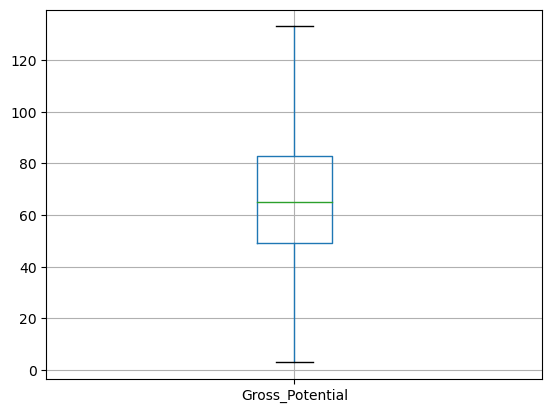

In [18]:
broadway_outliers = broadway[(broadway.Gross_Potential < broadway.Gross_Potential.quantile(.995)) & (broadway.Gross_Potential > broadway.Gross_Potential.quantile(.005))]
gross_potent = broadway_outliers.boxplot('Gross_Potential')
gross_potent.plot()
plt.show()


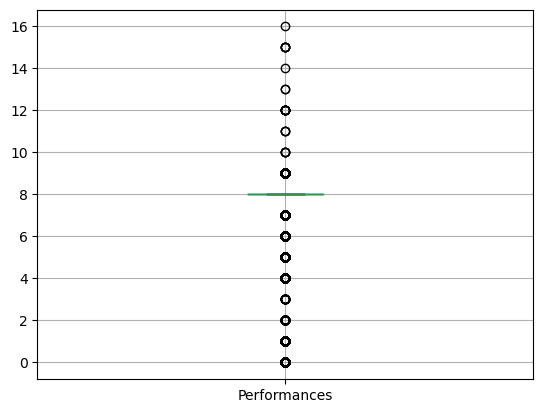

In [19]:
performances = broadway.boxplot(column='Performances')
performances.plot()
plt.show()

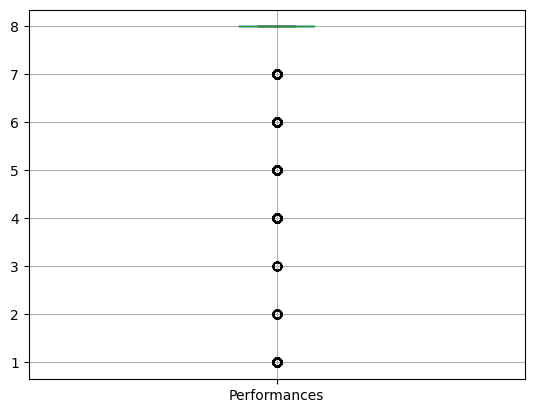

In [20]:
broadway_outliers = broadway[(broadway.Performances < broadway.Performances.quantile(.995)) & (broadway.Performances > broadway.Performances.quantile(.005))]
performances = broadway_outliers.boxplot('Performances')
performances.plot()
plt.show()

In [21]:
broadway_outliers.shape

(28636, 12)

In [22]:
round(broadway_outliers.corr(),2)

C:\Users\loniw\AppData\Local\Temp\ipykernel_16196\560904991.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(broadway_outliers.corr(),2)


,Day,Month,Year,Attendance,Capacity,Gross,Gross_Potential,Performances
Day,1.00,0.01,-0.00,0.04,0.07,0.03,0.05,0.00
Month,0.01,1.00,-0.05,-0.01,-0.03,0.02,0.01,-0.02
Year,-0.00,-0.05,1.00,-0.02,0.05,0.41,0.24,0.03
Attendance,0.04,-0.01,-0.02,1.00,0.58,0.78,0.43,0.22
Capacity,0.07,-0.03,0.05,0.58,1.00,0.57,0.57,0.03
Gross,0.03,0.02,0.41,0.78,0.57,1.00,0.62,0.17
Gross_Potential,0.05,0.01,0.24,0.43,0.57,0.62,1.00,0.09
Performances,0.00,-0.02,0.03,0.22,0.03,0.17,0.09,1.00


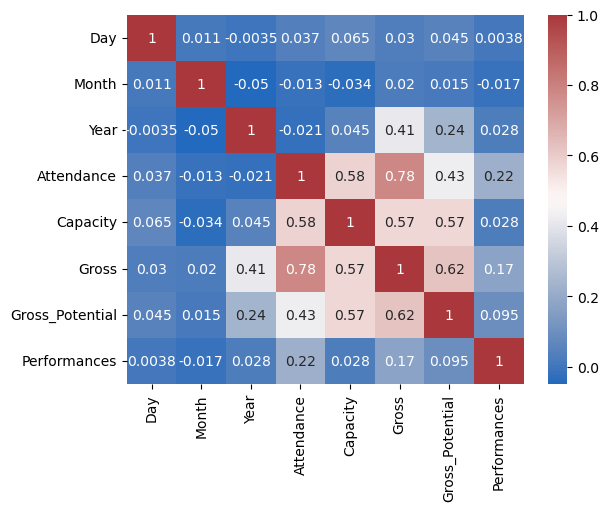

In [25]:
cmap = sns.color_palette("vlag", as_cmap=True)
correlation = broadway_outliers.corr(numeric_only=True)

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap=cmap)
plt.show()

In [26]:
#removing attributes that have little to no correlation
broadway_outliers.drop(columns=['Day','Month'], inplace=True)

C:\Users\loniw\AppData\Local\Temp\ipykernel_16196\1644350308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  broadway_outliers.drop(columns=['Day','Month'], inplace=True)


In [27]:
broadway_outliers.info()
#confimring columns were dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28636 entries, 0 to 31295
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Full             28636 non-null  object
 1   Year             28636 non-null  int64 
 2   Name             28636 non-null  object
 3   Theatre          28636 non-null  object
 4   Type             28636 non-null  object
 5   Attendance       28636 non-null  int64 
 6   Capacity         28636 non-null  int64 
 7   Gross            28636 non-null  int64 
 8   Gross_Potential  28636 non-null  int64 
 9   Performances     28636 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 2.4+ MB


In [56]:
broadway_outliers.sort_values('Year')


,Full,Year,Name,Theatre,Type,Attendance,Capacity,Gross,Gross_Potential,Performances
0,8/26/1990,1990,Tru,Booth,Play,5500,88,134456,0,8
25,9/8/1991,1991,Miss Saigon,Broadway,Musical,14088,101,783503,0,8
26,9/15/1991,1991,Miss Saigon,Broadway,Musical,14088,101,781614,0,8
27,9/22/1991,1991,Miss Saigon,Broadway,Musical,14088,101,780148,0,8
28,9/29/1991,1991,Miss Saigon,Broadway,Musical,14088,101,776172,0,8
...,...,...,...,...,...,...,...,...,...,...
30605,3/27/2016,2016,Blackbird,Belasco,Play,6223,77,475196,54,8
30606,3/27/2016,2016,Bright Star,Cort,Musical,7969,95,384716,42,5
30607,3/27/2016,2016,Chicago,Ambassador,Musical,7974,92,723791,77,8
30575,3/20/2016,2016,Chicago,Ambassador,Musical,6914,80,574676,61,8


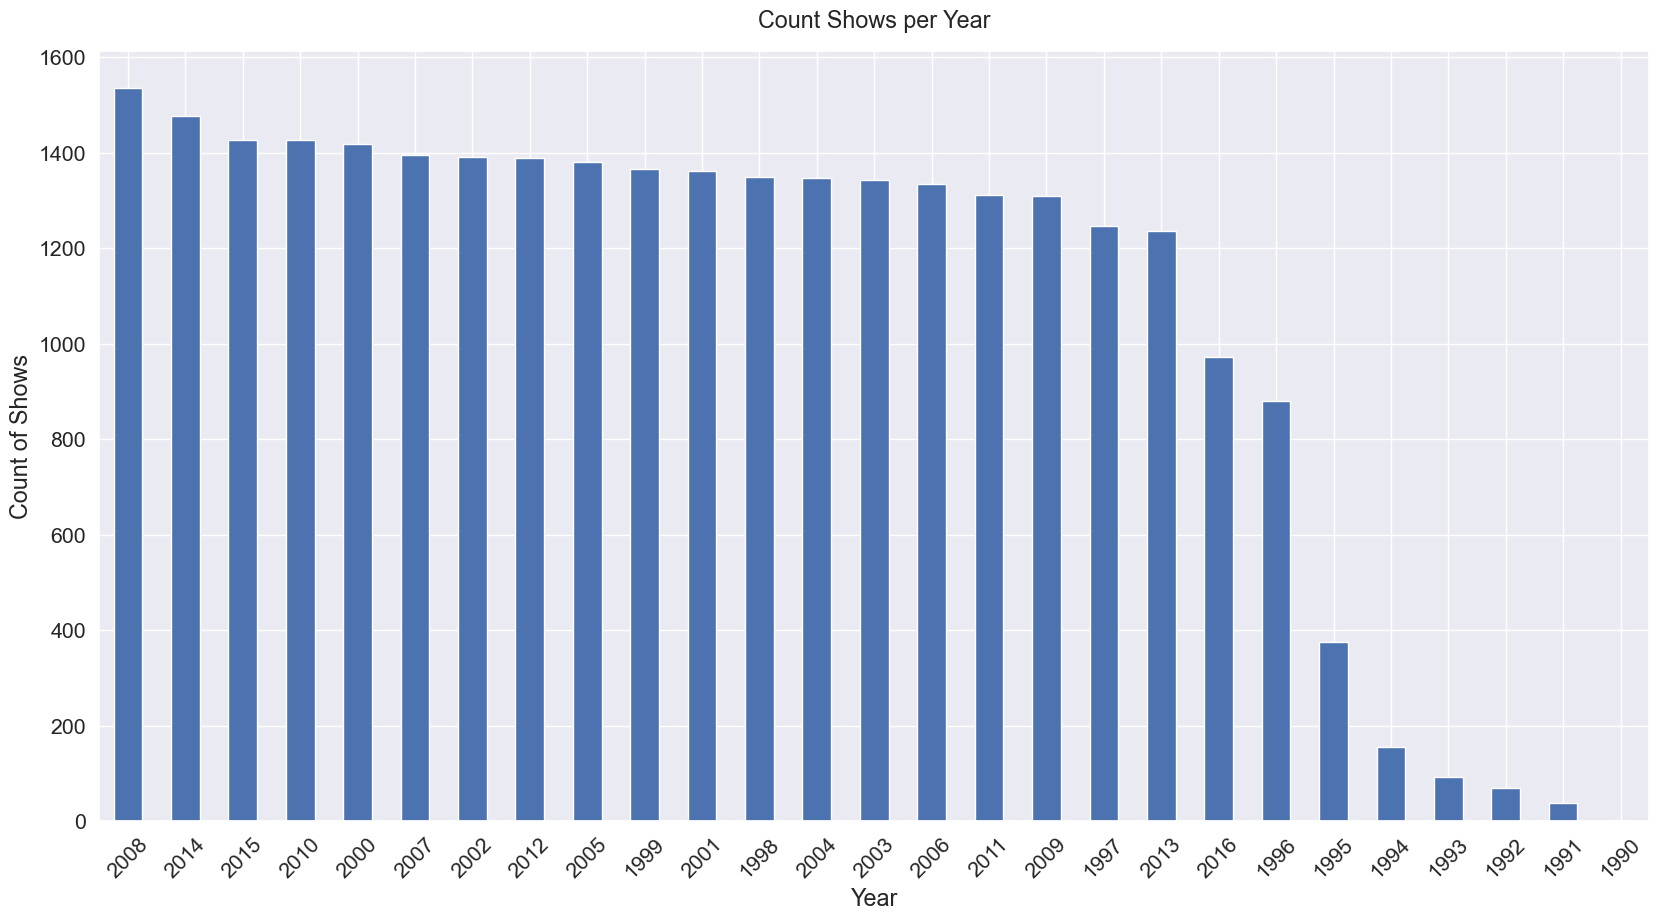

In [60]:
broadway_outliers['Year'].value_counts().plot(kind='bar', figsize=(20, 10), rot=45)
plt.xlabel("Year")
plt.ylabel("Count of Shows", labelpad=4)
plt.title("Count Shows per Year", y=1.02)
plt.show()

In [ ]:
sns.distplot(broadway['Year'])
plt.show()